В качестве домашнего задания  рассмотреть решение задачи классификации на каких-нибудь простых данных с использованием как минимум одной из моделей машинного обучения из библиотеки sklearn.

In [1]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = load_wine()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Подберем оптимальное кол-во деревьев

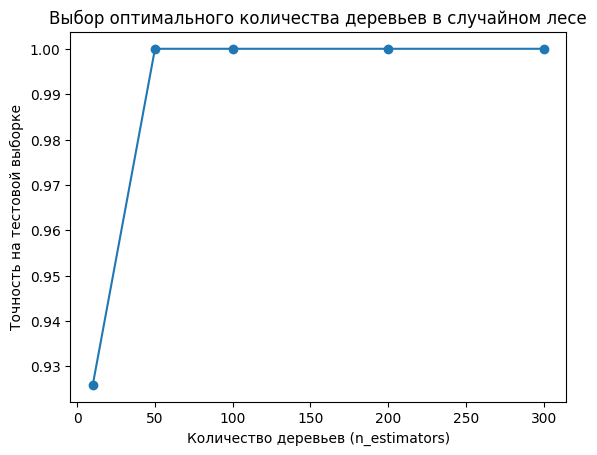

In [3]:
n_estimators_values = [10, 50, 100, 200, 300]  # Количество деревьев в случайном лесе
accuracy_scores = []

for n_estimators in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Построим график зависимости точности от количества деревьев
plt.plot(n_estimators_values, accuracy_scores, marker='o')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('Точность на тестовой выборке')
plt.title('Выбор оптимального количества деревьев в случайном лесе')
plt.show()

In [4]:
best_n_estimators = n_estimators_values[np.argmax(accuracy_scores)]
model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Лучшее количество деревьев: 50
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



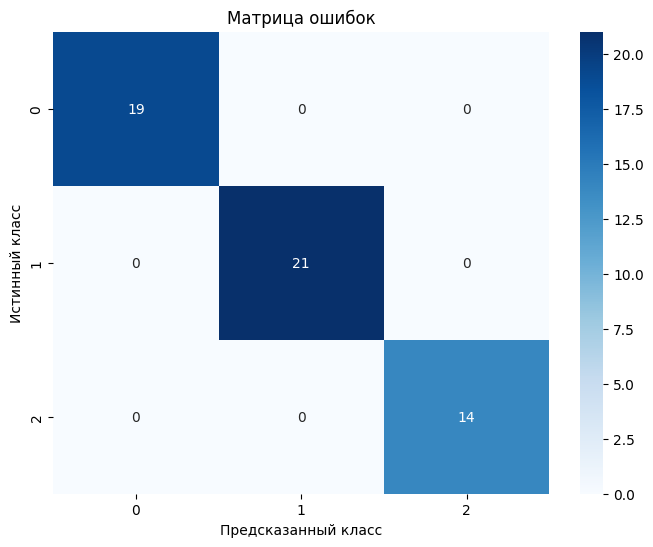

In [5]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Лучшее количество деревьев: {best_n_estimators}")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()